In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
def read_data(filename, pos_plot, Nmin, Nmax):
    fin = open(filename, 'r')
    data = {}
    fin.readline()
    while True:
        line = fin.readline()
        if not line:
            break
        line = line.split()
        N = int(line[0])
        if Nmin <= N and  N <= Nmax:
            if N not in data.keys():
                data[N] = [[float(line[pos_plot[0]]), float(line[pos_plot[1]]), int(line[2])]]
            else:
                data[N].append([float(line[pos_plot[0]]), float(line[pos_plot[1]]), int(line[2])])
    fin.close()
    for key in data.keys():
        data[key] = np.array(data[key])
    return data

In [20]:
def read_fits(string1, string2, N_list):
    fits = {}
    for N in N_list:
        fname = string1 + str(N) + string2
        fits[N] = []
        fin = open(fname, 'r')
        while True:
            line = fin.readline()
            if not line:
                break
            line = line.split()
            fits[N].append([float(line[0]), float(line[1])])
        fin.close()
    for key in fits.keys():
        fits[key] = np.array(fits[key])
    return fits

In [38]:
def plot_model_curve(data, fits, figname, xlim, ylim):
    ax = plt.gca()
    # plt.figure(figsize=(8, 6), dpi=250)
    N_list = sorted(data.keys())
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for i in range(len(N_list)):
        N = N_list[i]
        color = color_cycle[i % len(color_cycle)]
        std_list = list(map(lambda x: np.sqrt(x[1]*(1-x[1])/x[2]), data[N]))
        plt.errorbar(data[N][:, 0], data[N][:, 1], yerr=std_list, fmt='o', label=f'N={N}', c=color)
        plt.plot(fits[N][:, 0], fits[N][:, 1], c=color)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('c', fontsize=18)
    plt.xticks(fontsize=14)
    plt.ylabel('P(SAT)', fontsize=18)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.savefig(figname, dpi=1000)
    plt.show()

# 3-COL


In [33]:
q = 3
Nmin = 128
Nmax = 4096
path = f'/media/david/Data/UH/Grupo_de_investigacion/Hard_benchmarks/Coloring/PI-GNN/Results/Recurrent/random_graphs/Mixed/q_{q}/Stats'
result_file = path + "/" + "Solved_recurrent_mixed_q_" + str(q) + "_ErdosRenyi_ntrials_5.txt"
string_fit_1 = path + "/" + "sigmoid_data_N_"
string_fit_2 = "_q_" + str(q) + ".txt"
figname = path + "/" + "Coloring_q_" + str(q) + "_rPIGNN.png"

In [21]:
data = read_data(result_file, [1, 3], Nmin, Nmax)
fits = read_fits(string_fit_1, string_fit_2, sorted(data.keys()))

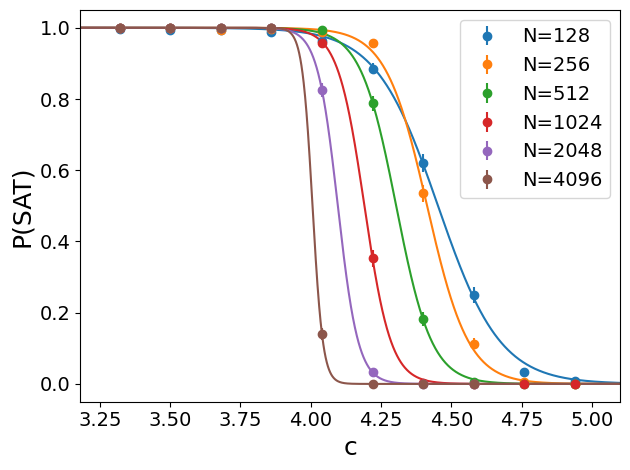

In [39]:
xlim = (3.18, 5.1)
ylim = (-0.05, 1.05)
plot_model_curve(data, fits, figname, xlim, ylim)

# 5-COL

In [41]:
q = 5
Nmin = 128
Nmax = 4096
path = f'/media/david/Data/UH/Grupo_de_investigacion/Hard_benchmarks/Coloring/PI-GNN/Results/Recurrent/random_graphs/Mixed/q_{q}/Stats'
result_file = path + "/" + "Solved_recurrent_mixed_q_" + str(q) + "_ErdosRenyi_ntrials_5.txt"
string_fit_1 = path + "/" + "sigmoid_data_N_"
string_fit_2 = "_q_" + str(q) + ".txt"
figname = path + "/" + "Coloring_q_" + str(q) + "_rPIGNN.png"

In [42]:
data = read_data(result_file, [1, 3], Nmin, Nmax)
fits = read_fits(string_fit_1, string_fit_2, sorted(data.keys()))

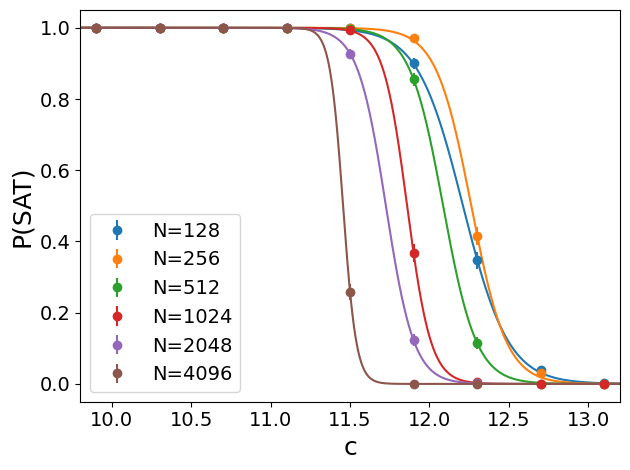

In [46]:
xlim = (9.8, 13.2)
ylim = (-0.05, 1.05)
plot_model_curve(data, fits, figname, xlim, ylim)